In [2]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

In [3]:
boston = datasets.load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
df = pd.DataFrame(data = boston.data)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
df['Target']=boston.target

In [9]:
df = df.rename(columns = {'Target':'Price'})

In [10]:
corr = df.corr()

In [11]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [12]:
corr['Price'].sort_values(ascending= False)

Price    1.000000
5        0.695360
1        0.360445
11       0.333461
7        0.249929
3        0.175260
6       -0.376955
8       -0.381626
0       -0.388305
4       -0.427321
9       -0.468536
2       -0.483725
10      -0.507787
12      -0.737663
Name: Price, dtype: float64

In [22]:
corr_values = corr['Price'].abs().sort_values(ascending = False)
corr_values

Price    1.000000
12       0.737663
5        0.695360
10       0.507787
2        0.483725
9        0.468536
4        0.427321
0        0.388305
8        0.381626
6        0.376955
1        0.360445
11       0.333461
7        0.249929
3        0.175260
Name: Price, dtype: float64

corr_values

In [19]:
from sklearn import preprocessing
x_RM = preprocessing.scale(df[5])
x_LSTAT = preprocessing.scale(df[12])
y = preprocessing.scale(df['Price'])

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

#plotting both feature in same plot

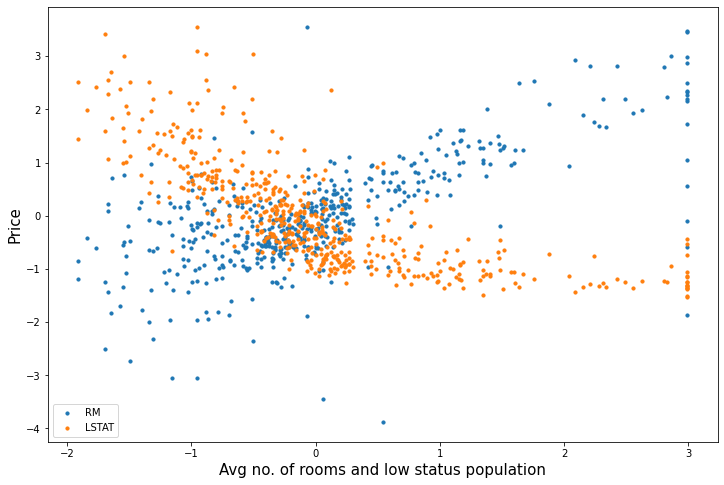

In [24]:
plt.scatter(y, x_RM, s=10, label ='RM')
plt.scatter(y, x_LSTAT,s=10 , label = 'LSTAT')
plt.legend(fontsize=15)
plt.xlabel('Avg no. of rooms and low status population', fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.legend()
plt.show()

# TRYING FROM SCRATCH

In [34]:
x = np.c_[np.ones(x_RM.shape[0]),x_RM,x_LSTAT]
x

array([[ 1.        ,  0.41367189, -1.0755623 ],
       [ 1.        ,  0.19427445, -0.49243937],
       [ 1.        ,  1.28271368, -1.2087274 ],
       ...,
       [ 1.        ,  0.98496002, -0.98304761],
       [ 1.        ,  0.72567214, -0.86530163],
       [ 1.        , -0.36276709, -0.66905833]])

In [27]:
alpha = 0.0001
m = y.size
np.random.seed(10)
theta = np.random.rand(3)    #initializing theta wihh some random values


In [28]:
def gradient_decent(x, y, m, theta ,alpha):
    cost_list =[]    #to record all cost values
    theta_list =[]   #to record all theta0 and theta1 values
    prediction_list = []
    run =True
    cost_list.append(1e10)     #we append some large values to cost list
    i=0
    
    while run:
        prediction = np.dot(x,theta)
        prediction_list.append(prediction)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T,error)
        cost_list.append(cost)
        theta = theta - (alpha * (1/m) *np.dot(x.T,error))
        theta_list.append(theta)
        if cost_list[i]-cost_list[i+1] < 1e-9:
            run = False
            
        i += 1
    cost_list.pop(0)
    return prediction_list, cost_list, theta_list

In [29]:
prediction_list ,cost_list , theta_list = gradient_decent(x,y,m ,theta,alpha)
theta = theta_list[-1]


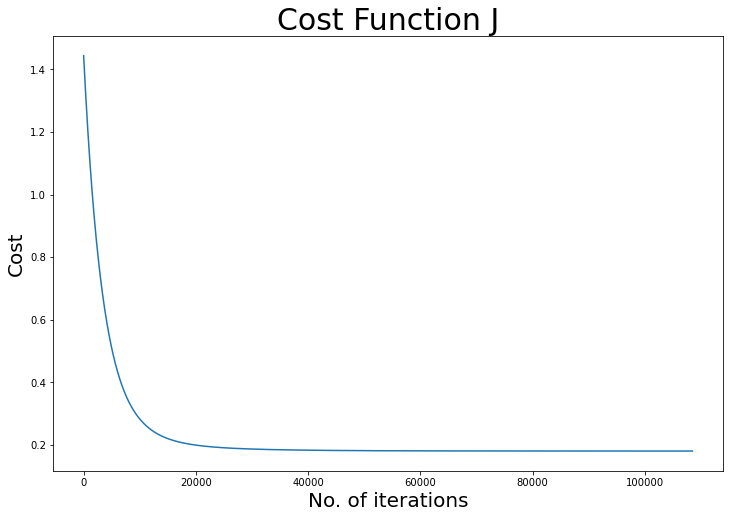

In [30]:
plt.title('Cost Function J',size = 30)
plt.xlabel('No. of iterations',size = 20)
plt.ylabel('Cost',size=20)
plt.plot(cost_list)
plt.show()

In [31]:
yp = theta[0]+ theta[1]*x[:,1] + theta[2]*x[:,2]

# USING ScI-KIT LEARN

In [32]:
from sklearn.linear_model import LinearRegression
ys = df['Price']
xs = np.c_[df[5],df[12]]

In [33]:
ys.shape, xs.shape

((506,), (506, 2))

In [35]:
xs = preprocessing.scale(xs)
ys = preprocessing.scale(ys)

In [36]:
lm = LinearRegression()
lm.fit(xs,ys)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
pred = lm.predict(xs)
#pred

In [43]:
pred.shape

(506,)

In [44]:
intercept = lm.intercept_
Theta_0 = lm.coef_[0]
Theta_1 = lm.coef_[1]

print('Intercept : {}'.format(round(intercept,3)))
print('Theta_0 : {}'.format(round(Theta_0,4)))
print('Theta_1 : {}'.format(round(Theta_1,4)))

Intercept : 0.0
Theta_0 : 0.3892
Theta_1 : -0.4988


from gradient decent doing from scratch

In [45]:
print('Intercept : {}'.format(round(theta[0],3)))
print('Theta_0 : {}'.format(round(theta[1],4)))
print('Theta_1 : {}'.format(round(theta[2],4)))

Intercept : 0.0
Theta_0 : 0.395
Theta_1 : -0.493


# Model performance

In [46]:
r2_sk = lm.score(xs,ys)
print('R square from sci-kit learn: {}'.format(round(r2_sk,4)))

R square from sci-kit learn: 0.6386


In [47]:
r2 = 1- (sum((y-prediction_list[-1])**2)) / (sum((y-y.mean())**2))
print('R square doing from the scratch: {}'.format(round(r2,4)))

R square doing from the scratch: 0.6385


# Animation

In [48]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (12,10))
ax = Axes3D(fig)
ax.set_xlabel('Rooms',fontsize =15)
ax.set_ylabel('Population',fontsize =15)
ax.set_zlabel('Price',fontsize =15)

plt.close()

In [53]:
# Function for getting the 2D view

def plot_view(elev_given, azim_given):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    #Scatter plot
    ax.scatter(xs[:,0], xs[:,1], ys, c='C6', marker='o', alpha=0.6, label='Data points')

    #Plane 

    x0, x1 = np.meshgrid(xs[:,0], xs[:,1])
    yp = Theta_0 * x0 + Theta_1 * x1
    ax.plot_wireframe(x0,x1,yp, rcount=200,ccount=200, linewidth = 0.5, color='C9', alpha=0.5, label='Hyperplane')

    ax.set_xlabel('Rooms', fontsize = 15)
    ax.set_ylabel('Population', fontsize = 15)
    ax.set_zlabel('Price', fontsize = 15)
    plt.legend(fontsize=15)
    ax.view_init(elev=elev_given, azim=azim_given)

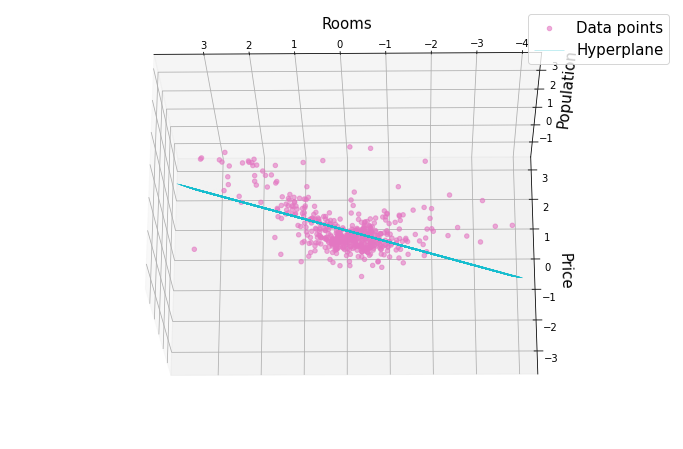

In [54]:
plot_view(-23,91)
plt.show()

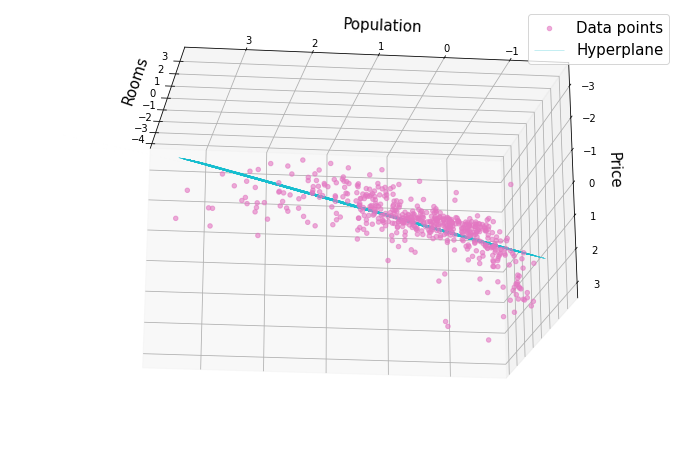

In [55]:
plot_view(158,-172)
plt.show()

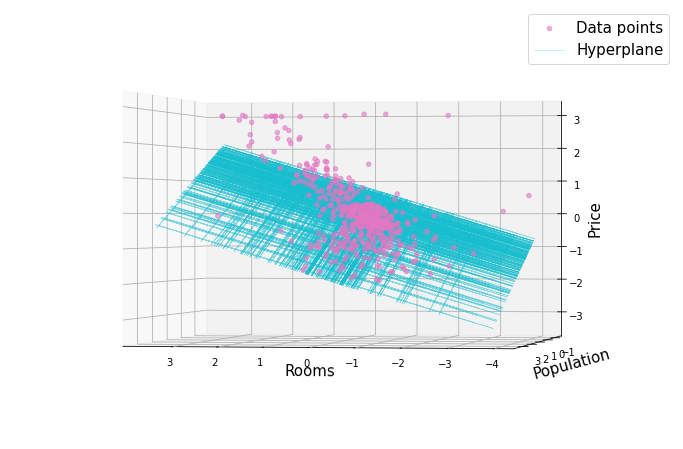

In [56]:
plot_view(0,100)
plt.show()

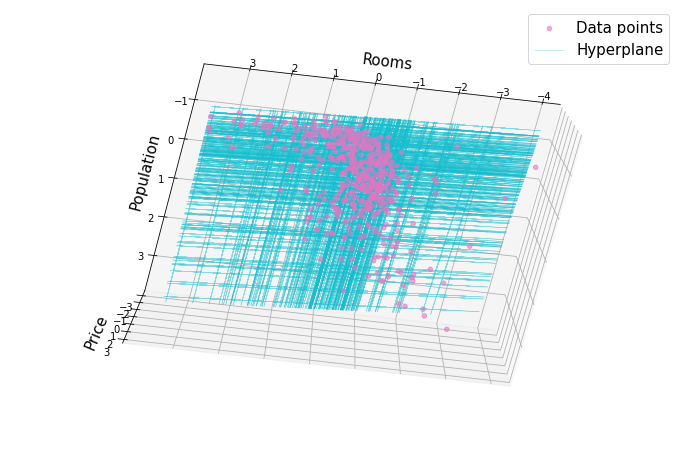

In [57]:
plot_view(100,100)
plt.show()